## EXPLORATORY DATA ANALYSIS AND UNDERSTANDING

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [5]:
raw_data = pd.read_csv('propulsion.csv')
data = raw_data.copy()
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('GT Turbine decay state coefficient.', axis=1)

In [6]:
data.head(5)

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lever position (lp) [ ]                        10000 non-null  float64
 1   Ship speed (v) [knots]                         10000 non-null  float64
 2   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 3   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 7   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 8   GT Compressor inlet air temperature (T1) [C]   10000 non-null  float64
 9   GT Compressor outlet air temperature (T2) [C]  1000

In [8]:
x = data.drop(["GT Compressor decay state coefficient."], axis = 1)
y = data['GT Compressor decay state coefficient.']

In [9]:
from sklearn.model_selection import train_test_split

#Training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

#Training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

print("Training set shape: ", x_train.shape, y_train.shape)
print("Validation set shape: ", x_val.shape, y_val.shape)
print("Test set shape: ", x_test.shape, y_test.shape)

Training set shape:  (8100, 16) (8100,)
Validation set shape:  (900, 16) (900,)
Test set shape:  (1000, 16) (1000,)


In [10]:
x_train.head(5)

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s]
3784,2.088,6.0,4315.301,1344.298,6827.946,22.346,22.346,558.875,288.0,567.769,1.243,0.998,6.708,1.019,23.114,0.208
6652,9.300,27.0,72774.661,3560.431,9780.459,644.793,644.793,1091.063,288.0,783.495,4.489,0.998,22.435,1.049,90.161,1.785
4587,8.206,24.0,50996.595,3087.612,9325.390,438.082,438.082,932.683,288.0,738.735,3.559,0.998,18.230,1.041,60.619,1.200
7084,1.138,3.0,3780.867,1416.906,6725.479,11.493,11.493,549.412,288.0,563.999,1.236,0.998,6.643,1.019,0.000,0.182
2847,5.140,15.0,21629.626,1924.335,8481.309,175.271,175.271,696.204,288.0,634.274,2.083,0.998,11.030,1.027,24.548,0.486


In [11]:
x_train.columns

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]'],
      dtype='object')

### Target variable - 'GT Compressor decay state coefficient.' clearly shows following Uniform Distribution type, maybe with multimodal peaks as well

GT Compressor decay state coefficient. - Plots


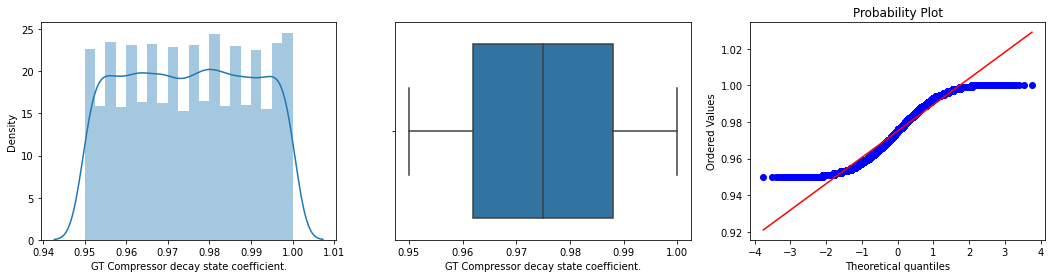

In [12]:
#display(train_df.target.describe())
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.distplot(y_train, ax=ax[0])
sns.boxplot(y_train, ax=ax[1])
stats.probplot(y_train, plot=ax[2])
print('GT Compressor decay state coefficient. - Plots')
plt.show()

In [13]:
data['GT Compressor decay state coefficient.'].describe()

count    10000.000000
mean         0.975021
std          0.014734
min          0.950000
25%          0.962000
50%          0.975000
75%          0.988000
max          1.000000
Name: GT Compressor decay state coefficient., dtype: float64

#### Note : Coefficients are lying in strictly close range from 0.95 to 1. It a closed boundary regression problem, so after exploratory data analysis it will be worthwhile to try nearest neighbour regression based approaches as well on raw data directly.

### Very low correlation found between target variables and features

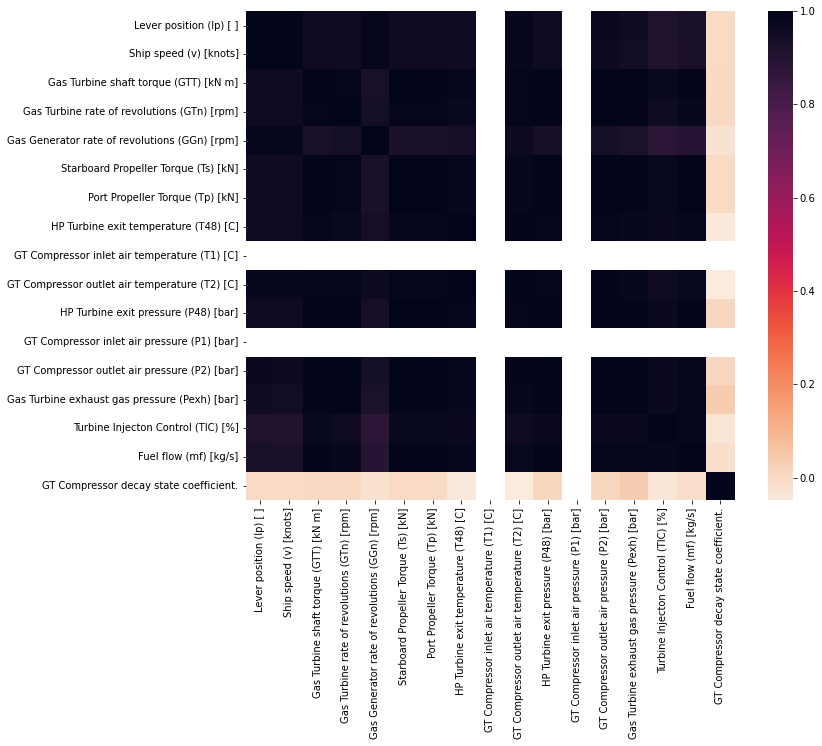

In [14]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, cmap='rocket_r');

### Dropping 2 columns which contains constant values, look like they are just configuration datapoints

In [15]:
data.drop(['GT Compressor inlet air temperature (T1) [C]','GT Compressor inlet air pressure (P1) [bar]'], axis=1, inplace=True)

In [16]:
data.columns

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.'],
      dtype='object')

### Scatterplot - Taking 4 features at a time for better visualization

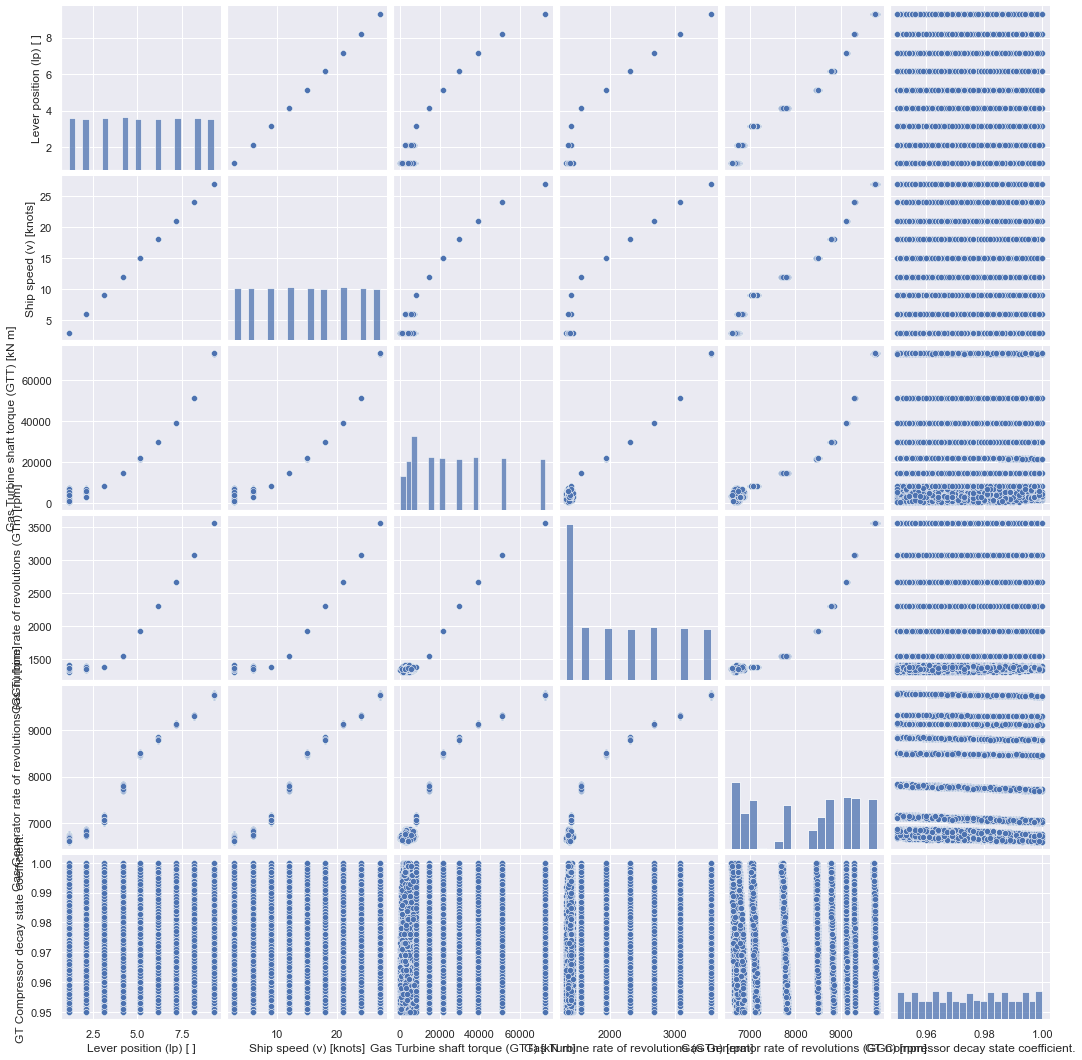

In [17]:
sns.set()

cols = ['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'GT Compressor decay state coefficient.'
       ]
sns.pairplot(data[cols])
plt.show();

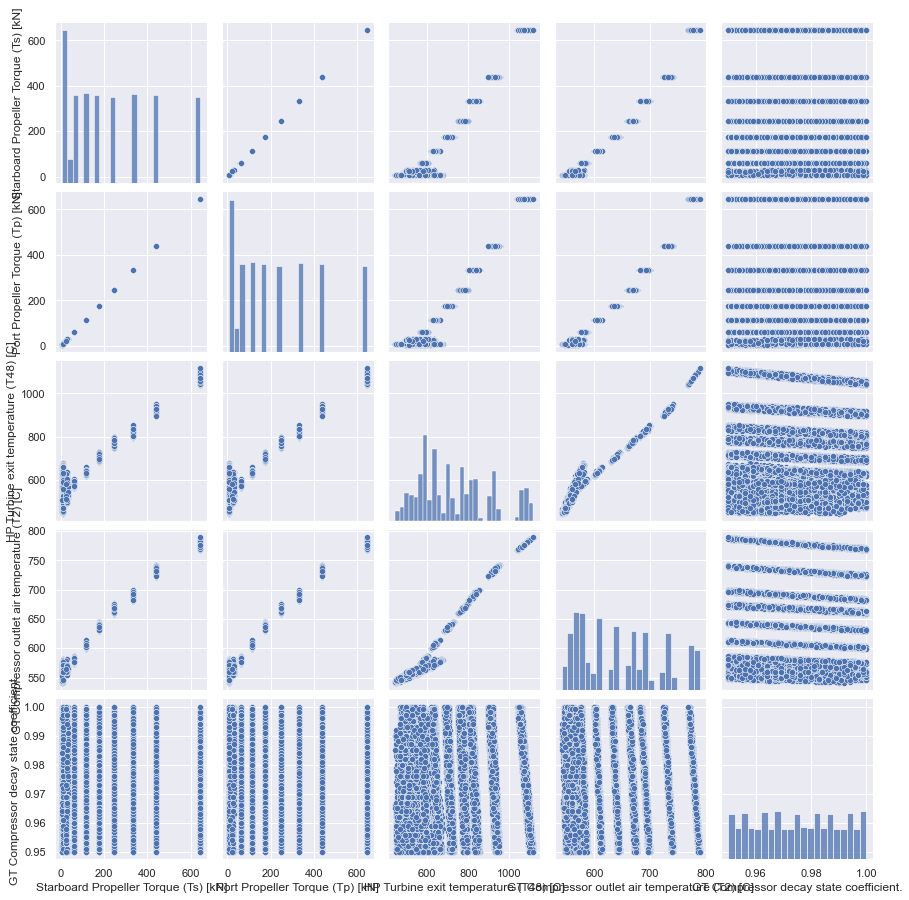

In [18]:
sns.set()

cols = ['Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'GT Compressor decay state coefficient.'
       ]
sns.pairplot(data[cols])
plt.show();

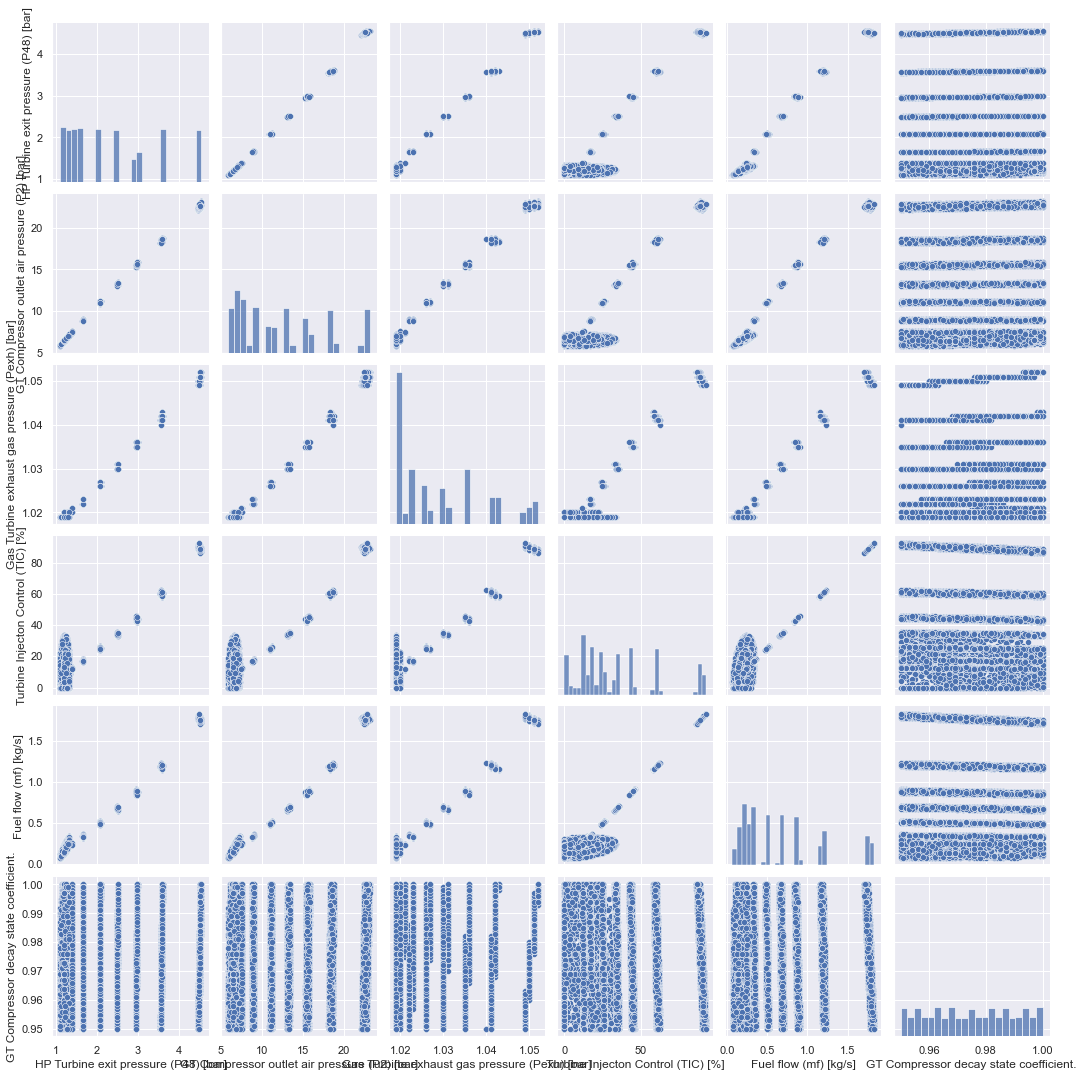

In [19]:
sns.set()

cols = ['HP Turbine exit pressure (P48) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.'
       ]
sns.pairplot(data[cols])
plt.show();

### Note 1 : From all the pair plots it appears that features are highly correlated amongst themselves and there is very less linear relationship between target variable 'GT Compressor decay state coefficient.' and feature columns

### Note 2 : The interaction between target variables and feature columns looks like forming band pattenrs instead of continuous distribution, this hints that any method that can split boundaries based on bands can be a helpful model in this datasets

## Aplying transformation MinMax Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head(5)

Scaled Dataset Using MinMaxScaler


,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.
0,1.000000,1.000,0.999709,0.999846,0.986506,0.999308,0.999308,0.956466,0.964570,0.989328,0.984924,0.939394,0.977084,0.976190,0.46
1,0.617128,0.625,0.406826,0.443462,0.682962,0.376137,0.376137,0.495018,0.501872,0.411018,0.439579,0.333333,0.373785,0.349773,0.90
2,0.245773,0.250,0.111985,0.035092,0.144203,0.085967,0.085967,0.216123,0.159568,0.086242,0.100393,0.030303,0.134805,0.101474,0.60
3,0.245773,0.250,0.112010,0.035096,0.158806,0.086000,0.086000,0.187642,0.143356,0.085665,0.091324,0.060606,0.126172,0.092404,0.68
4,0.617128,0.625,0.406833,0.443462,0.683589,0.376153,0.376153,0.484489,0.494500,0.411018,0.435883,0.363636,0.369009,0.344671,0.96


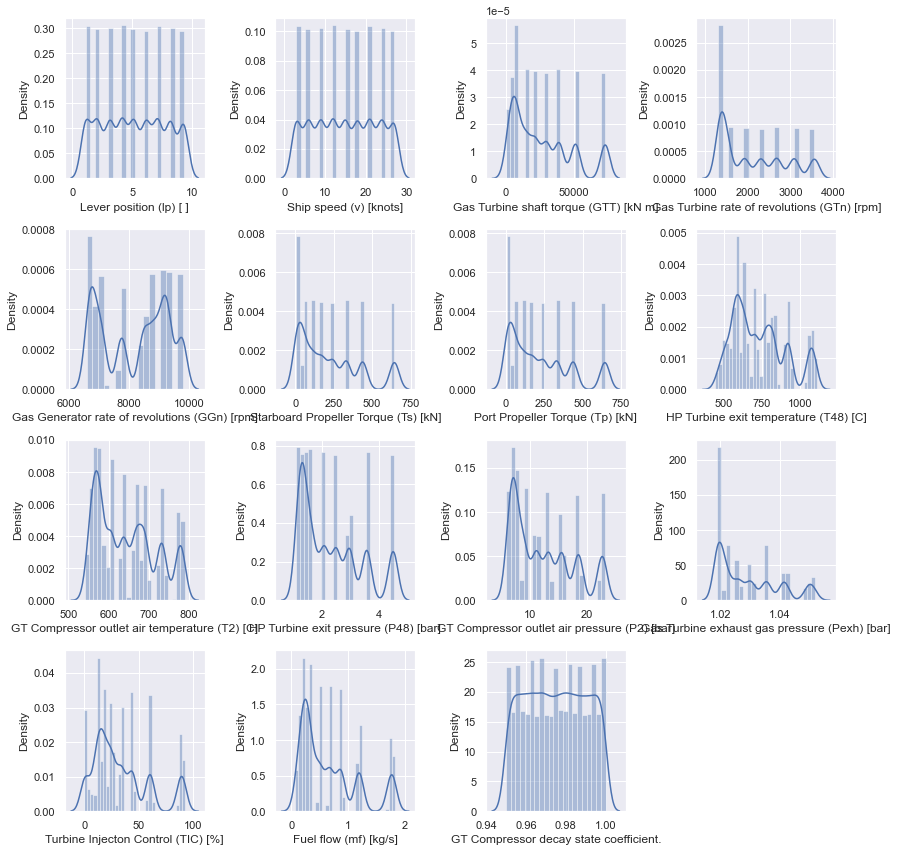

In [21]:
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,12))
for i, var in enumerate(data.columns):
    row = int(i/4)
    col = i%4
    sns.distplot(data[var], ax=ax[row, col])

f.delaxes(ax[3, 3])
plt.tight_layout()
plt.show()
        

### Note : It appears that most of the features are following multimodal distribution and target is following close to uniform distribution

In [22]:
df_scaled.skew()

Lever position (lp) [ ]                          0.027522
Ship speed (v) [knots]                           0.005318
Gas Turbine shaft torque (GTT) [kN m]            0.772659
Gas Turbine rate of revolutions (GTn) [rpm]      0.574646
Gas Generator rate of revolutions (GGn) [rpm]   -0.131909
Starboard Propeller Torque (Ts) [kN]             0.813792
Port Propeller Torque (Tp) [kN]                  0.813792
HP Turbine exit temperature (T48) [C]            0.569383
GT Compressor outlet air temperature (T2) [C]    0.433516
HP Turbine exit pressure (P48) [bar]             0.714260
GT Compressor outlet air pressure (P2) [bar]     0.635744
Gas Turbine exhaust gas pressure (Pexh) [bar]    0.779931
Turbine Injecton Control (TIC) [%]               0.905343
Fuel flow (mf) [kg/s]                            1.009498
GT Compressor decay state coefficient.           0.005292
dtype: float64

### Null Hypothesis : Values are drawn from normal distribution (P > 0.05)
### Alternate Hypothesis : Values are not drawn from normal distribution (P <= 0.05.)

## Shapiro-Wilk Test for testing Normal Distribution

In [23]:
from scipy.stats import shapiro
df_shap = df_scaled.apply(shapiro, axis=0).T
df_shap.columns = ['Statistics', 'P_Value']
df_shap['Normal'] = df_shap['P_Value'].apply(lambda x : True if x > 0.05 else False)
df_shap

,Statistics,P_Value,Normal
Lever position (lp) [ ],0.932488,0.0,False
Ship speed (v) [knots],0.931439,0.0,False
Gas Turbine shaft torque (GTT) [kN m],0.881934,0.0,False
Gas Turbine rate of revolutions (GTn) [rpm],0.848927,0.0,False
Gas Generator rate of revolutions (GGn) [rpm],0.889118,0.0,False
Starboard Propeller Torque (Ts) [kN],0.872742,0.0,False
Port Propeller Torque (Tp) [kN],0.872742,0.0,False
HP Turbine exit temperature (T48) [C],0.939667,0.0,False
GT Compressor outlet air temperature (T2) [C],0.922126,0.0,False
HP Turbine exit pressure (P48) [bar],0.874917,0.0,False


## D’Agostino’s K^2 Test

In [24]:
from scipy.stats import normaltest
df_dag = df_scaled.apply(normaltest, axis=0).T
df_dag.columns = ['Statistics', 'P_Value']
df_dag['Normal'] = df_dag['P_Value'].apply(lambda x : True if x > 0.05 else False)
df_dag

,Statistics,P_Value,Normal
Lever position (lp) [ ],9852.342384,0.000000e+00,False
Ship speed (v) [knots],11673.628027,0.000000e+00,False
Gas Turbine shaft torque (GTT) [kN m],972.348668,7.197299e-212,False
Gas Turbine rate of revolutions (GTn) [rpm],4181.837591,0.000000e+00,False
Gas Generator rate of revolutions (GGn) [rpm],62479.745092,0.000000e+00,False
Starboard Propeller Torque (Ts) [kN],973.011472,5.167059e-212,False
Port Propeller Torque (Tp) [kN],973.011472,5.167059e-212,False
HP Turbine exit temperature (T48) [C],823.965963,1.196918e-179,False
GT Compressor outlet air temperature (T2) [C],2891.638336,0.000000e+00,False
HP Turbine exit pressure (P48) [bar],1203.274132,5.156347e-262,False


## Confirming that Neither the features not the target variable follows normal distribution


# Building Models

## MULTIPLE LINEAR REGRESSION

False - There must be a linear relationship between the outcome variable and the independent variables.

TODO : Multiple regression assumes that the residuals are normally distributed.

TODO : No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other. This assumption is tested using Variance Inflation Factor (VIF) values

In [25]:
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def get_data(df_scaled = df_scaled.copy()):
    df_scaled = df_scaled.sample(frac=1)

    y = np.array(df_scaled['GT Compressor decay state coefficient.'])
    x = df_scaled.drop('GT Compressor decay state coefficient.', axis=1).to_numpy()
    
    return train_test_split(x, y, test_size = 0.1)

In [26]:
#Training and test sets
x_train, x_test, y_train, y_test = get_data()

print("Training set shape: ", x_train.shape, y_train.shape)
print("Test set shape: ", x_test.shape, y_test.shape)

Training set shape:  (9000, 14) (9000,)
Test set shape:  (1000, 14) (1000,)


In [27]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est_fit = est.fit()
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3687.
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:51   Log-Likelihood:                 6538.8
No. Observations:                9000   AIC:                        -1.305e+04
Df Residuals:                    8986   BIC:                        -1.295e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8454      0.006    131.611      0.0

In [28]:
X_test = sm.add_constant(x_test)
y_hat = est_fit.predict(X_test)
residual = y_hat-y_test

rmse = np.sqrt(mean_squared_error(y_test, y_hat)) #Evaluating model rmse score by comparing actual and predicted results
print(f'RMSE : {rmse}')

RMSE : 0.11541712898605552


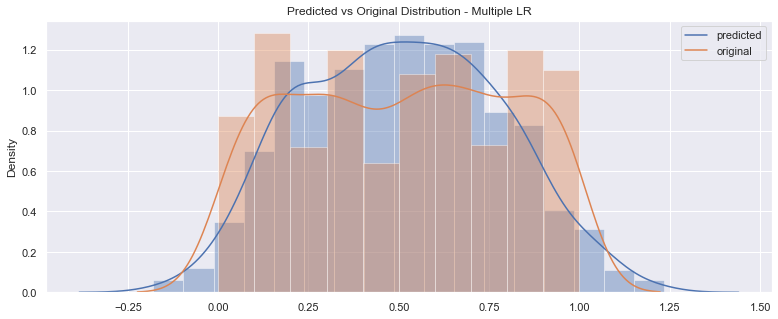

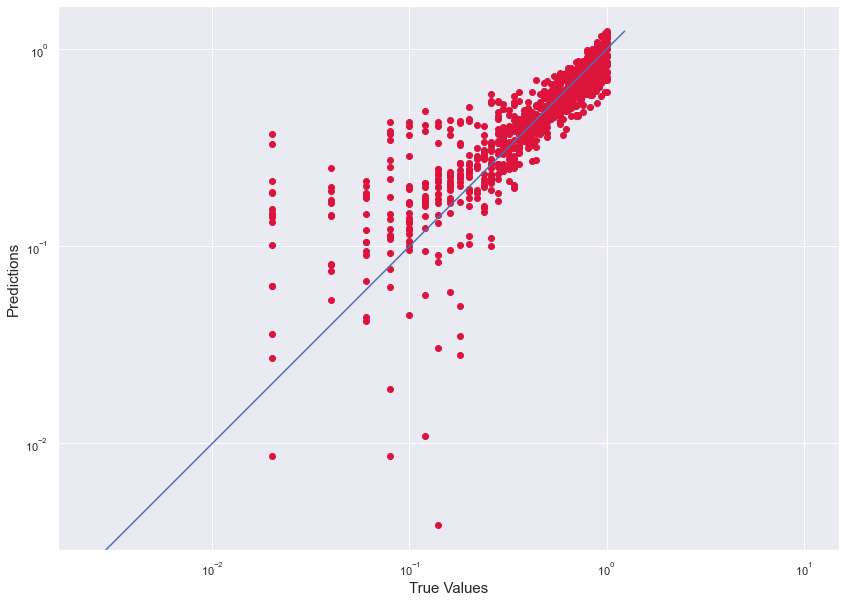

In [29]:

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
sns.distplot(y_hat, ax=ax)
sns.distplot(y_test, ax=ax)
ax.legend(labels=['predicted','original'])
ax.set_title('Predicted vs Original Distribution - Multiple LR')

true_value = y_test
predicted_value = y_hat

plt.figure(figsize=(14,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Probability plot for residuals


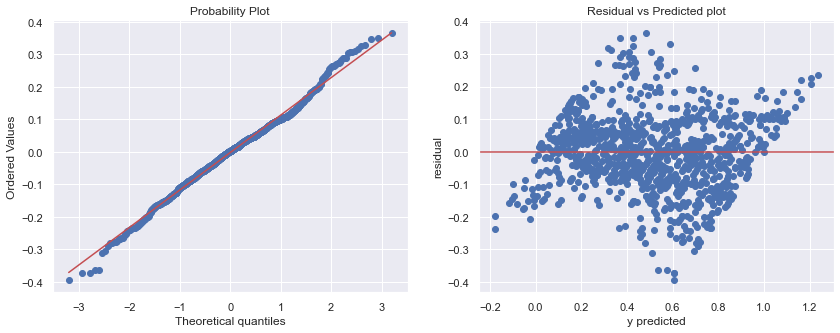

In [30]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
stats.probplot(residual, plot=ax[0])
print('Probability plot for residuals')
ax[1].scatter(y_hat, residual)
ax[1].axhline(y=0, color='r')
ax[1].set_xlabel('y predicted')
ax[1].set_ylabel('residual')
ax[1].set_title('Residual vs Predicted plot')
plt.show()

In [31]:
res_shap = shapiro(residual)[1]
if res_shap > 0.05:
    print ('Shapiro : Normal Distribution')
    print(res_shap)
else :
    print('Shapiro : Normal Distribution not found')
    print(res_shap)
    
res_dag = normaltest(residual)[1]
if res_dag > 0.05:
    print ('D-Augustino : Normal Distribution') 
    print(res_dag)
else :
    print('D-Augustino : Normal Distribution not found')
    print(res_dag)

Shapiro : Normal Distribution not found
0.0003526218351908028
D-Augustino : Normal Distribution not found
0.013399009594918155


### Note : We can clearly see that residual are still not fully normally distributed, for the lower values of y, residuals are negative and for the higher values of y residual are positive

In [32]:
[(i+1,name) for i,name in enumerate(df_scaled.drop('GT Compressor decay state coefficient.', axis=1).columns)]


[(1, 'Lever position (lp) [ ]'),
 (2, 'Ship speed (v) [knots]'),
 (3, 'Gas Turbine shaft torque (GTT) [kN m]'),
 (4, 'Gas Turbine rate of revolutions (GTn) [rpm]'),
 (5, 'Gas Generator rate of revolutions (GGn) [rpm]'),
 (6, 'Starboard Propeller Torque (Ts) [kN]'),
 (7, 'Port Propeller Torque (Tp) [kN]'),
 (8, 'HP Turbine exit temperature (T48) [C]'),
 (9, 'GT Compressor outlet air temperature (T2) [C]'),
 (10, 'HP Turbine exit pressure (P48) [bar]'),
 (11, 'GT Compressor outlet air pressure (P2) [bar]'),
 (12, 'Gas Turbine exhaust gas pressure (Pexh) [bar]'),
 (13, 'Turbine Injecton Control (TIC) [%]'),
 (14, 'Fuel flow (mf) [kg/s]')]

### Dropping 8th Feature because of high insignificant P-Value

In [33]:
print('Dropping 8th Feature beacuse of high insignificant P-Value')

rmse_list = []

for i in range(5):
    df_scaled = df_scaled.sample(frac=1)
    
    y = np.array(df_scaled['GT Compressor decay state coefficient.'])
    x = df_scaled.drop(['GT Compressor decay state coefficient.',
                       'HP Turbine exit temperature (T48) [C]'], axis=1).to_numpy()

    #Training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

    #Training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

    X2 = sm.add_constant(x_train)
    est = sm.OLS(y_train, X2)
    est_fit = est.fit()

    X_test = sm.add_constant(x_test)
    y_hat = est_fit.predict(X_test)
    residual = y_hat-y_test

    rmse = np.sqrt(mean_squared_error(y_test, y_hat)) #Evaluating model rmse score by comparing actual and predicted results
    rmse_list.append(rmse)
    
    print(f'Fold {i+1} : RMSE - {rmse}')

print(est_fit.summary())
avg_rmse = np.array(rmse_list).mean()
print('='*50)
print(f'RMSE avg : {avg_rmse}')
print('='*50)

Dropping 8th Feature beacuse of high insignificant P-Value
Fold 1 : RMSE - 0.11675317984349554
Fold 2 : RMSE - 0.11352804433904055
Fold 3 : RMSE - 0.11519432051588142
Fold 4 : RMSE - 0.1148007927808254
Fold 5 : RMSE - 0.11889639820904978
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3586.
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:53   Log-Likelihood:                 5850.3
No. Observations:                8100   AIC:                        -1.167e+04
Df Residuals:                    8087   BIC:                        -1.158e+04
Df Model:                          12                                         
Covariance Type:            nonrobust              

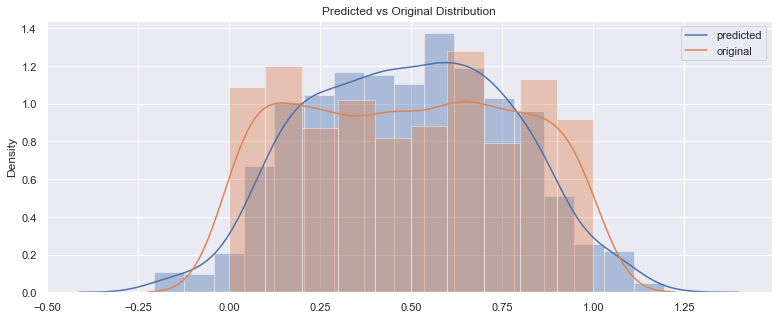

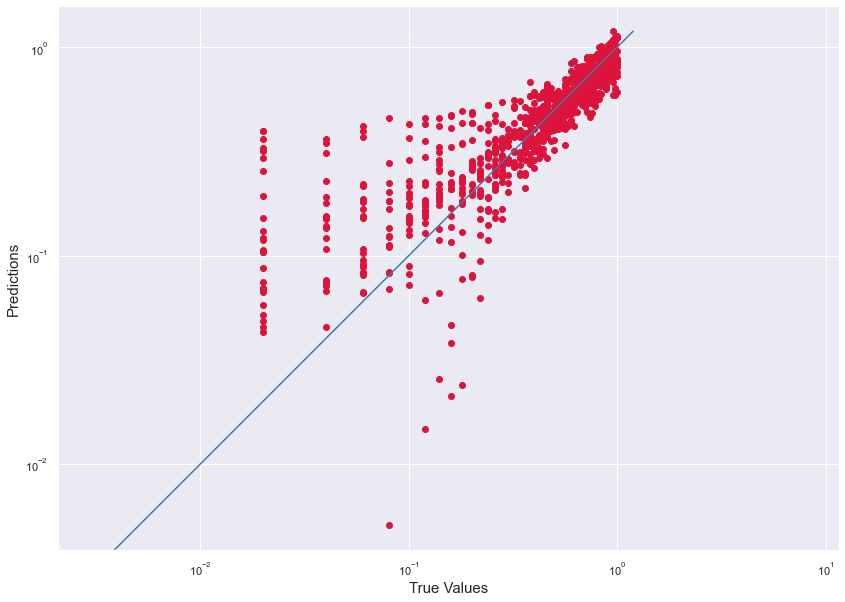

Probability plot for residuals


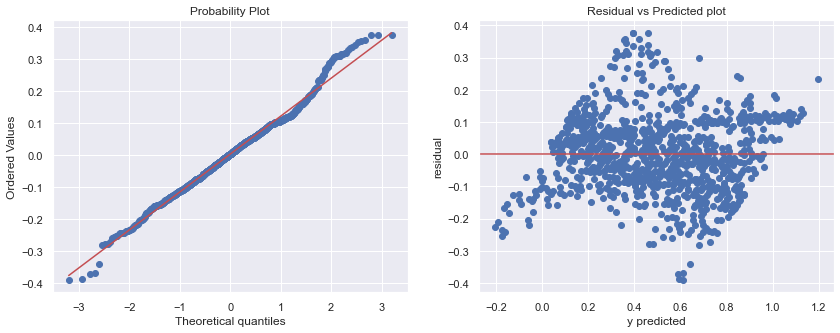

In [34]:
# X_test = sm.add_constant(x_test)
# y_hat = est_fit.predict(X_test)
residual = y_hat-y_test

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
sns.distplot(y_hat, ax=ax)
sns.distplot(y_test, ax=ax)
ax.legend(labels=['predicted','original'])
ax.set_title('Predicted vs Original Distribution')

true_value = y_test
predicted_value = y_hat

plt.figure(figsize=(14,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
stats.probplot(residual, plot=ax[0])
print('Probability plot for residuals')
ax[1].scatter(y_hat, residual)
ax[1].axhline(y=0, color='r')
ax[1].set_xlabel('y predicted')
ax[1].set_ylabel('residual')
ax[1].set_title('Residual vs Predicted plot')
plt.show()

In [35]:
res_shap = shapiro(residual)[1]
if res_shap > 0.05:
    print ('Shapiro : Normal Distribution')
    print(res_shap)
else :
    print('Shapiro : Normal Distribution not found')
    print(res_shap)
    
res_dag = normaltest(residual)[1]
if res_dag > 0.05:
    print ('D-Augustino : Normal Distribution') 
    print(res_dag)
else :
    print('D-Augustino : Normal Distribution not found')
    print(res_dag)

Shapiro : Normal Distribution not found
9.376019988849293e-06
D-Augustino : Normal Distribution not found
0.0007307528743854219


### MULTIPLE LINEAR REGRESSION - Assumption update

False - There must be a linear relationship between the outcome variable and the independent variables.

False : Multiple regression assumes that the residuals are normally distributed.

TODO : No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other. This assumption is tested using Variance Inflation Factor (VIF) values

## VIF Calculation

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_scaled.drop(['GT Compressor decay state coefficient.',
                   'HP Turbine exit temperature (T48) [C]'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)
print('\n\n\nNote : All the variables are highly correlated')

                                          feature           VIF
0                         Lever position (lp) [ ]  1.205034e+05
1                          Ship speed (v) [knots]  9.867606e+04
2           Gas Turbine shaft torque (GTT) [kN m]  1.410023e+04
3     Gas Turbine rate of revolutions (GTn) [rpm]  3.388698e+03
4   Gas Generator rate of revolutions (GGn) [rpm]  5.986216e+02
5            Starboard Propeller Torque (Ts) [kN]           inf
6                 Port Propeller Torque (Tp) [kN]           inf
7   GT Compressor outlet air temperature (T2) [C]  3.595889e+03
8            HP Turbine exit pressure (P48) [bar]  5.091842e+04
9    GT Compressor outlet air pressure (P2) [bar]  1.070705e+04
10  Gas Turbine exhaust gas pressure (Pexh) [bar]  2.509582e+03
11             Turbine Injecton Control (TIC) [%]  1.380806e+02
12                          Fuel flow (mf) [kg/s]  1.217959e+04



Note : All the variables are highly correlated


### MULTIPLE LINEAR REGRESSION - Assumption update

False - There must be a linear relationship between the outcome variable and the independent variables.

False : Multiple regression assumes that the residuals are normally distributed.

False : No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other. This assumption is tested using Variance Inflation Factor (VIF) values

**Conclusion : 
Inspite of good R^2, adjusted R^2 and F-statistics value, p-value came out significant for all the remaining variables, But still we could see that residuals were not randomly distributed and a pattern was clearly visible in the residual plot which clearly reflects the presece of synergy among variables which was later verified by calculating the VIF among the variables as well. Thus for this dataset MLR might not be a good choice.**

## Polynomial Regaression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

print('Dropping 8th Feature beacuse of high insignificant P-Value')

rmse_list = []

for i in range(5):
    df_scaled = df_scaled.sample(frac=1)
    y = np.array(df_scaled['GT Compressor decay state coefficient.'])
    x = df_scaled.drop(['GT Compressor decay state coefficient.',
                       'HP Turbine exit temperature (T48) [C]'], axis=1).to_numpy()

    #Training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

    #Training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

    poly = PolynomialFeatures(degree = 2)
    x_train_poly = poly.fit_transform(x_train)

    X3 = sm.add_constant(x_train_poly)
    estp = sm.OLS(y_train, X3)
    estp_fit = estp.fit()
    
    x_test = poly.fit_transform(x_test)

    X_test = sm.add_constant(x_test)
    y_hat = estp_fit.predict(X_test)
    residual = y_hat-y_test

    rmse = np.sqrt(mean_squared_error(y_test, y_hat)) #Evaluating model rmse score by comparing actual and predicted results
    rmse_list.append(rmse)
    
    print(f'Fold {i+1} : RMSE - {rmse}')

print(estp_fit.summary())
avg_rmse = np.array(rmse_list).mean()
print('='*50)
print(f'RMSE avg : {avg_rmse}')
print('='*50)

Dropping 8th Feature beacuse of high insignificant P-Value
Fold 1 : RMSE - 0.0010620512580242153
Fold 2 : RMSE - 0.001067337709089535
Fold 3 : RMSE - 0.0010889190587740729
Fold 4 : RMSE - 0.001059338378393377
Fold 5 : RMSE - 0.001058790105463414
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.448e+06
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:58:59   Log-Likelihood:                 44302.
No. Observations:                8100   AIC:                        -8.842e+04
Df Residuals:                    8009   BIC:                        -8.778e+04
Df Model:                          90                                         
Covariance Type:            nonrobust      

RMSE score:  0.001058790105463414


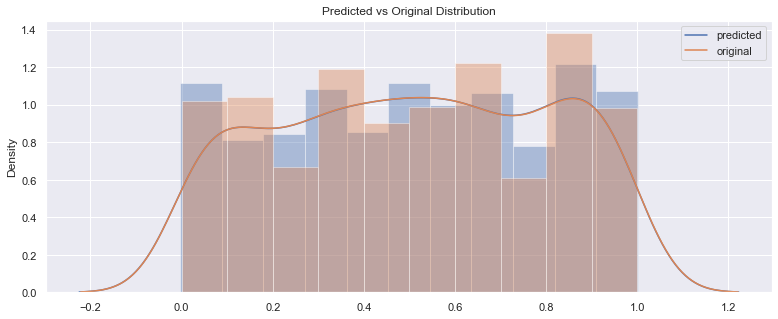

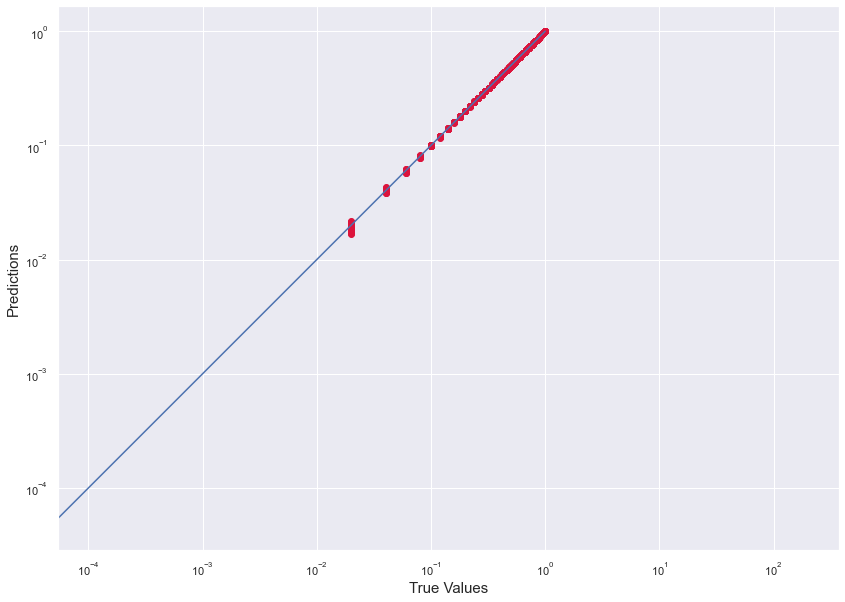

Probability plot for residuals


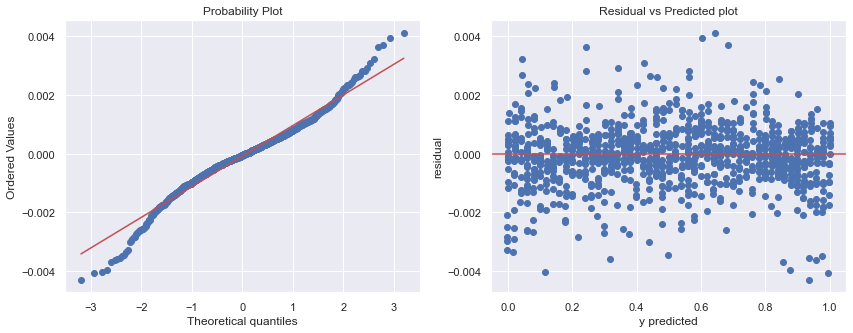

In [38]:
# x_test = poly.fit_transform(x_test)

# X_test = sm.add_constant(x_test)
# y_hat = estp_fit.predict(X_test)
residual = y_hat-y_test

rmse = np.sqrt(mean_squared_error(y_test, y_hat)) #Evaluating model rmse score by comparing actual and predicted results
print("RMSE score: ", rmse)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
sns.distplot(y_hat, ax=ax)
sns.distplot(y_test, ax=ax)
ax.legend(labels=['predicted','original'])
ax.set_title('Predicted vs Original Distribution')

true_value = y_test
predicted_value = y_hat

plt.figure(figsize=(14,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
stats.probplot(residual, plot=ax[0])
print('Probability plot for residuals')
ax[1].scatter(y_hat, residual)
ax[1].axhline(y=0, color='r')
ax[1].set_xlabel('y predicted')
ax[1].set_ylabel('residual')
ax[1].set_title('Residual vs Predicted plot')
plt.show()

In [39]:
res_shap = shapiro(residual)[1]
if res_shap > 0.05:
    print ('Shapiro : Normal Distribution')
    print(res_shap)
else :
    print('Shapiro : Normal Distribution not found')
    print(res_shap)
    
res_dag = normaltest(residual)[1]
if res_dag > 0.05:
    print ('D-Augustino : Normal Distribution') 
    print(res_dag)
else :
    print('D-Augustino : Normal Distribution not found')
    print(res_dag)

Shapiro : Normal Distribution not found
2.6524911282167773e-13
D-Augustino : Normal Distribution not found
9.94284488496644e-14


In [40]:
def calculate_poly_reg(deg, df_scaled = df_scaled.copy()):
    rmse_list = []
    
    for i in range(5):
        df_scaled = df_scaled.sample(frac=1)

        y = np.array(df_scaled['GT Compressor decay state coefficient.'])
        x = df_scaled.drop(['GT Compressor decay state coefficient.',
                           'HP Turbine exit temperature (T48) [C]'], axis=1).to_numpy()

        #Training and test sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 41)

        #Training and validation sets
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

        poly = PolynomialFeatures(degree = deg)
        x_train_poly = poly.fit_transform(x_train)

        X3 = sm.add_constant(x_train_poly)
        estp = sm.OLS(y_train, X3)
        estp_fit = estp.fit()

        x_test = poly.fit_transform(x_test)

        X_test = sm.add_constant(x_test)
        y_hat = estp_fit.predict(X_test)
        residual = y_hat-y_test

        rmse = np.sqrt(mean_squared_error(y_test, y_hat)) #Evaluating model rmse score by comparing actual and predicted results
        rmse_list.append(rmse)
        
    avg_rmse = np.array(rmse_list).mean()
    print(f"Degree : {deg}, RMSE score: {avg_rmse}")

In [41]:
calculate_poly_reg(2)
calculate_poly_reg(3)
calculate_poly_reg(4)

Degree : 2, RMSE score: 0.0010362449260419811
Degree : 3, RMSE score: 0.00030279179872772416
Degree : 4, RMSE score: 4.006409354103973


## Best Polynomial Regression result : Degree of 3


In [42]:
raw_data = pd.read_csv('propulsion.csv')
data = raw_data.copy()
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('GT Compressor decay state coefficient.', axis=1)
data.drop(['GT Compressor inlet air temperature (T1) [C]','GT Compressor inlet air pressure (P1) [bar]'], axis=1, inplace=True)

scaler_tur = MinMaxScaler()

df_scaled = scaler_tur.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

from sklearn.preprocessing import PolynomialFeatures

print('Dropping 8th Feature beacuse of high insignificant P-Value')

rmse_list = []

for i in range(5):
    df_scaled = df_scaled.sample(frac=1)
    y = np.array(df_scaled['GT Turbine decay state coefficient.'])
    x = df_scaled.drop(['GT Turbine decay state coefficient.',
                       'HP Turbine exit temperature (T48) [C]'], axis=1).to_numpy()

    #Training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

    #Training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

    poly = PolynomialFeatures(degree = 2)
    x_train_poly = poly.fit_transform(x_train)

    X3 = sm.add_constant(x_train_poly)
    estp = sm.OLS(y_train, X3)
    estp_fit = estp.fit()
    
    x_test = poly.fit_transform(x_test)

    X_test = sm.add_constant(x_test)
    y_hat = estp_fit.predict(X_test)
    residual = y_hat-y_test

    rmse = np.sqrt(mean_squared_error(y_test, y_hat)) #Evaluating model rmse score by comparing actual and predicted results
    rmse_list.append(rmse)
    
    print(f'Fold {i+1} : RMSE - {rmse}')

print(estp_fit.summary())
avg_rmse = np.array(rmse_list).mean()
print('='*50)
print(f'RMSE avg : {avg_rmse}')
print('='*50)

Dropping 8th Feature beacuse of high insignificant P-Value
Fold 1 : RMSE - 0.0029555887398611835
Fold 2 : RMSE - 0.002813810988705113
Fold 3 : RMSE - 0.0029340652820775974
Fold 4 : RMSE - 0.0029436085678983645
Fold 5 : RMSE - 0.003010862869671271
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.806e+05
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:00:02   Log-Likelihood:                 35933.
No. Observations:                8100   AIC:                        -7.168e+04
Df Residuals:                    8009   BIC:                        -7.105e+04
Df Model:                          90                                         
Covariance Type:            nonrobust     

RMSE score:  0.003010862869671271


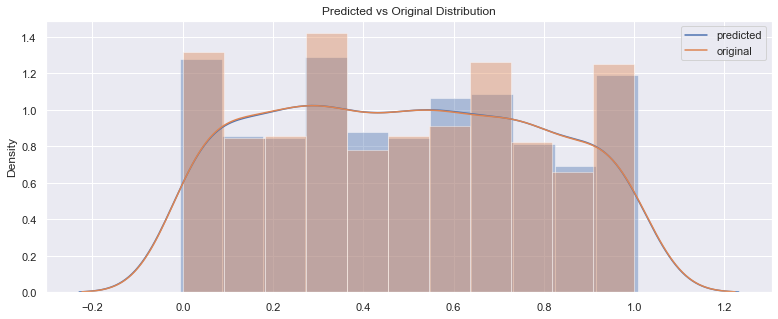

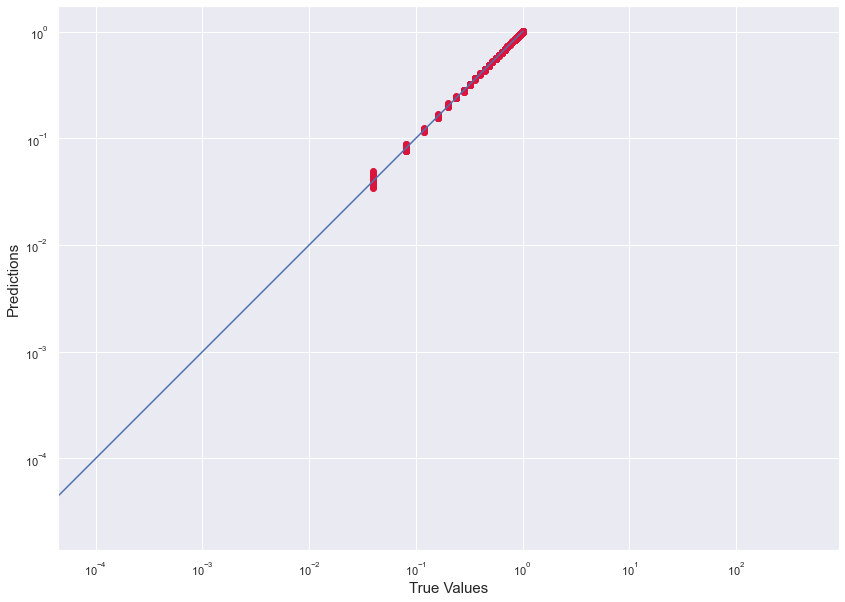

Probability plot for residuals


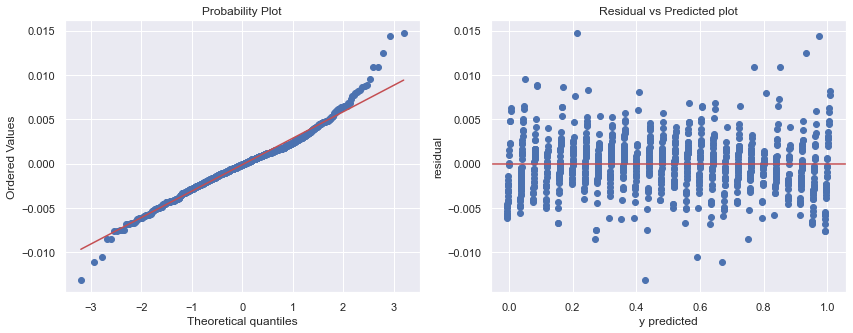

In [43]:
# x_test = poly.fit_transform(x_test)

# X_test = sm.add_constant(x_test)
# y_hat = estp_fit.predict(X_test)
residual = y_hat-y_test

rmse = np.sqrt(mean_squared_error(y_test, y_hat)) #Evaluating model rmse score by comparing actual and predicted results
print("RMSE score: ", rmse)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
sns.distplot(y_hat, ax=ax)
sns.distplot(y_test, ax=ax)
ax.legend(labels=['predicted','original'])
ax.set_title('Predicted vs Original Distribution')

true_value = y_test
predicted_value = y_hat

plt.figure(figsize=(14,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
stats.probplot(residual, plot=ax[0])
print('Probability plot for residuals')
ax[1].scatter(y_hat, residual)
ax[1].axhline(y=0, color='r')
ax[1].set_xlabel('y predicted')
ax[1].set_ylabel('residual')
ax[1].set_title('Residual vs Predicted plot')
plt.show()